In [1]:
# 这是关于第二章classfication 的一个回顾
# 导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series

In [2]:
# 导入需要的数据
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist=input_data.read_data_sets('MNIST')

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# 划分测试集和训练集
X_train=mnist.train.images
y_train=mnist.train.labels
X_test=mnist.test.images
y_test=mnist.test.labels

In [4]:
X_train.shape

(55000, 784)

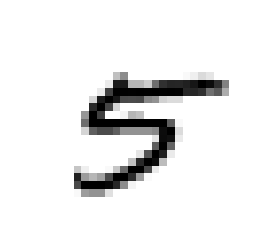

In [5]:
import matplotlib.pyplot as plt
import matplotlib
some_digit=X_train[36000]
some_digit_plot=some_digit.reshape(28,28)
plt.imshow(some_digit_plot,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off') # 控制坐标轴是否显示
plt.show()
plt.close()

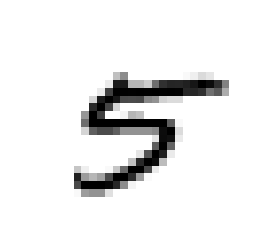

In [6]:
# 上面的可以写成一个函数
def plot_digit(data):
   datare=data.reshape(28,28)
   plt.imshow(datare,cmap=matplotlib.cm.binary,interpolation='nearest')
   plt.axis('off')
   plt.show()
   plt.close()
plot_digit(X_train[36000])    

In [7]:
# 绘制多个图像
# 一行数据有789个点，可以转换成一个28*28的图像，那么一行图像就需要28*280个点，一行画10个图
# 那么如果一行不是10个图怎么办，就需要我们来补充0，补充空白图像
# 这里需要使用两个np.concatenate来对数据进行转化
def plot_digits(datas,per_row_num=10):
    size=28
    images=[]
    for data in datas:
        redata=data.reshape(28,28)
        images.append(redata)
    # data_rownums=min(len(datas),per_row_num) # 这个是原作者的一个，当数据行数少于10行时，就启用这个
    # 这段将每行数据转换为28*28的一个像素点，并且将其添加到images这个list之中    
    data_rownums=len(datas)
    rownums=data_rownums//per_row_num + 1 # 这里加1是因为下面要计算有多少个空格
    nempty=rownums*per_row_num-data_rownums
    images.append(np.zeros((size,size*nempty)))
    # 现在images中包含了每一个字体图像和空白图像
    image=[]
    for rownum in range(rownums):
        rimages=images[rownum*per_row_num:(rownum+1)*per_row_num]  # 把10个28*28转化为一个28*280像素点
        image.append(np.concatenate(rimages,axis=1)) # 转化为6*28*280的三维数组
    image_end=np.concatenate(image,axis=0) # 组合成一个168*280 的二维数组 这个数值仅仅是针对下面这个例子
    plt.imshow(image_end,cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()
    plt.close()     

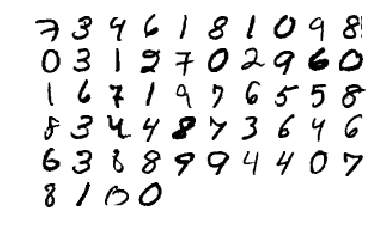

In [8]:
some_digits=X_train[:54,:]
plot_digits(some_digits)

In [9]:
# 混淆一些训练集
index=np.random.permutation(55000)
X_train,y_train=X_train[index],y_train[index]

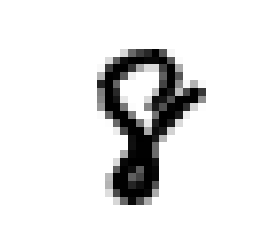

In [10]:
# 确认一下是不是一一对应
plot_digit(X_train[34000])

In [11]:
y_train[34000]

8

# 二分类问题 

In [12]:
# 我们从二分类问题开始
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [13]:
# 开始做模型
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [14]:
# 做预测--预测是否为5，发现确实是
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [15]:
# 现在千万不能直接上测试集，记住测试集放在最后使用
# 交叉验证下
from sklearn.cross_validation import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,scoring='accuracy',cv=3)

C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.93378423,  0.96329024,  0.96694485])

In [16]:
# 当然这里也能手动写交叉验证函数
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfold=StratifiedKFold(n_splits=3,random_state=42)
sgdc_clone=clone(sgd_clf)
for trainix,testix in skfold.split(X_train,y_train_5):
    x_fold_train=X_train[trainix]
    y_fold_train=y_train_5[trainix]
    x_fold_test=X_train[testix]
    y_fold_test=y_train_5[testix]
    sgdc_clone.fit(x_fold_train,y_fold_train)
    y_fold_predict=sgdc_clone.predict(x_fold_test)
    print((y_fold_predict==y_fold_test).sum()/(len(y_fold_test)))

0.933784226028
0.963290241641
0.966944853543


In [17]:
# 可以发现交叉验证的结果比较好，但是实际上效果真的这么好吗
# 构建一个estimator
from sklearn.base import BaseEstimator
class NotFiveEstimator(BaseEstimator):
    def fit(self,X,y):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool) # 意思就是不论输入是什么，全部预测为False,即全不是5
notfiveest=NotFiveEstimator()
cross_val_score(notfiveest,X_train,y_train_5,scoring='accuracy',cv=3)  
# 可以看到，即使全部判断为False,准确率依然非常之高，所以需要使用其他的判断指标来进行判断

array([ 0.90951238,  0.90901653,  0.9094529 ])

In [30]:
# precision,recall,f1
from sklearn.cross_validation import cross_val_predict
y_fold_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [19]:
# 然后引入一个混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_fold_predict)

array([[48803,  1210],
       [ 1283,  3704]], dtype=int64)

In [20]:
# precision--预测真有多少为真实真
3704/(3702+1210)

0.754071661237785

In [21]:
from sklearn.metrics import precision_score
precision_score(y_train_5,y_fold_predict)

0.75376475376475371

In [24]:
# recall-- 真实真中有多少被预测为真
3704/(3704+1283)

0.7427311008622418

In [23]:
from sklearn.metrics import recall_score
recall_score(y_train_5,y_fold_predict)

0.74273110086224181

In [25]:
# fl score 
from sklearn.metrics import f1_score
f1_score(y_train_5,y_fold_predict)

0.74820725179274816

In [26]:
3704/(3704+(1283+1210)/2)

0.7482072517927482

### 对于分类算法而言，都是先计算出decision_function的值，然后把decision_function的值和threshold进行比较，所以调整不同的threshold 将会得到不同的分类结果，好比SVM是计算出值后与0进行比较

In [27]:
y_score=sgd_clf.decision_function([some_digit])
y_score

array([ 6.87261202])

### 当我们把threshold 设置为0时，这时得到的结果就是为TRUE，当我们把threshold 设置为10时，这时就得到结果为FALSE。

In [34]:
# 进入下一个主题，如何选择合适的threshold，来使得recall和precision 为我们想要的值
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

TypeError: cross_val_predict() got an unexpected keyword argument 'method'

#### 这里注意一点就是，在cross_val_predict中选用method 为decison_function,返回结果为2列的数据，第1列全为0，第二列才是decision_function

In [32]:
help(cross_val_predict)

Help on function cross_val_predict in module sklearn.cross_validation:

cross_val_predict(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Generate cross-validated estimates for each input data point
    
    .. deprecated:: 0.18
        This module will be removed in 0.20.
        Use :func:`sklearn.model_selection.cross_val_predict` instead.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit' and 'predict'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs f